In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


with open("../Data/extractedAndcleanedData/cleaned_data.csv", "r", encoding="utf-8") as f:
    lines = [line.strip().split(",") for line in f]

max_cols = max(len(row) for row in lines)

lines_padded = [row + ['']*(max_cols - len(row)) for row in lines]

df2 = pd.DataFrame(lines_padded, columns=[f"col_{i}" for i in range(max_cols)])

transactions = df2.apply(lambda row: [str(x) for x in row if str(x).strip() not in ["", "NA"]], axis=1).tolist()

In [72]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)



In [73]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 994


In [74]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, 
                          metric="confidence", 
                          min_threshold=0.5)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
rules = rules[
    (rules['antecedents'].apply(len) > 0) &
    (rules['consequents'].apply(len) > 0)
]
print("Association Rules:", rules.shape[0])
rules_sorted_conf = rules.sort_values(by="confidence", ascending=False)
rules_sorted_conf.head(10)


Association Rules: 2763


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2075,"(/history/apollo/images, /shuttle/countdown/im...",(/shuttle/countdown),0.012697,0.383761,0.012697,1.0,2.605786,1.0,0.007825,inf,0.624164,0.033087,1.0,0.516543
665,"(/elv/PEGASUS, /elv/DELTA, /elv/ATLAS_CENTAUR)",(/elv),0.021982,0.030802,0.021982,1.0,32.465468,1.0,0.021305,inf,0.990982,0.713669,1.0,0.856835
160,"(/elv/PEGASUS, /elv/SCOUT)",(/elv),0.022514,0.030802,0.022514,1.0,32.465468,1.0,0.021821,inf,0.991521,0.730935,1.0,0.865468
680,"(/elv/DELTA, /elv/SCOUT, /elv/ATLAS_CENTAUR)",(/elv),0.022315,0.030802,0.022315,1.0,32.465468,1.0,0.021627,inf,0.991319,0.724460,1.0,0.862230
694,"(/elv/TITAN, /elv/DELTA, /elv/ATLAS_CENTAUR)",(/elv),0.022226,0.030802,0.022226,1.0,32.465468,1.0,0.021542,inf,0.991229,0.721583,1.0,0.860791
707,"(/elv/PEGASUS, /elv/SCOUT, /elv/ATLAS_CENTAUR)",(/elv),0.022027,0.030802,0.022027,1.0,32.465468,1.0,0.021348,inf,0.991027,0.715108,1.0,0.857554
721,"(/elv/PEGASUS, /elv/TITAN, /elv/ATLAS_CENTAUR)",(/elv),0.021894,0.030802,0.021894,1.0,32.465468,1.0,0.021219,inf,0.990892,0.710791,1.0,0.855396
1684,"(/elv/PEGASUS, /elv/DELTA, /elv/SCOUT, /elv/AT...",(/elv),0.021938,0.030802,0.021938,1.0,32.465468,1.0,0.021262,inf,0.990937,0.712230,1.0,0.856115
735,"(/elv/TITAN, /elv/SCOUT, /elv/ATLAS_CENTAUR)",(/elv),0.022226,0.030802,0.022226,1.0,32.465468,1.0,0.021542,inf,0.991229,0.721583,1.0,0.860791
2532,"(/elv/PEGASUS, /elv/ATLAS_CENTAUR, /elv/DELTA,...",(/elv),0.021761,0.030802,0.021761,1.0,32.465468,1.0,0.021091,inf,0.990758,0.706475,1.0,0.853237


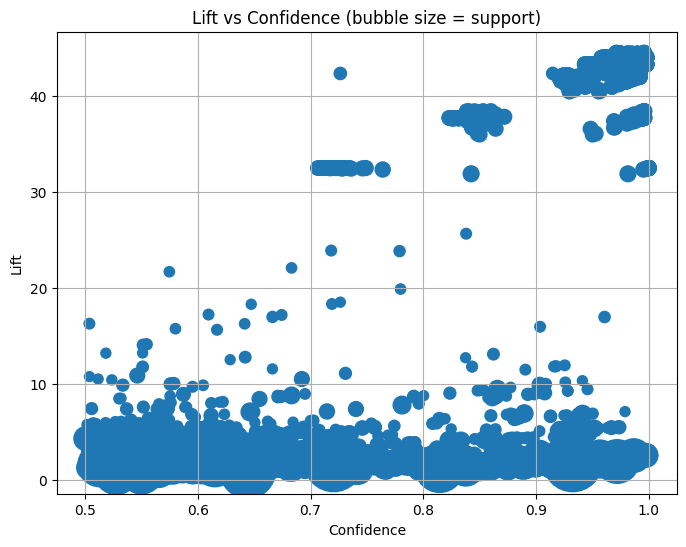

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], s=rules['support']*5000)

plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Lift vs Confidence (bubble size = support)")
plt.grid(True)
plt.show()

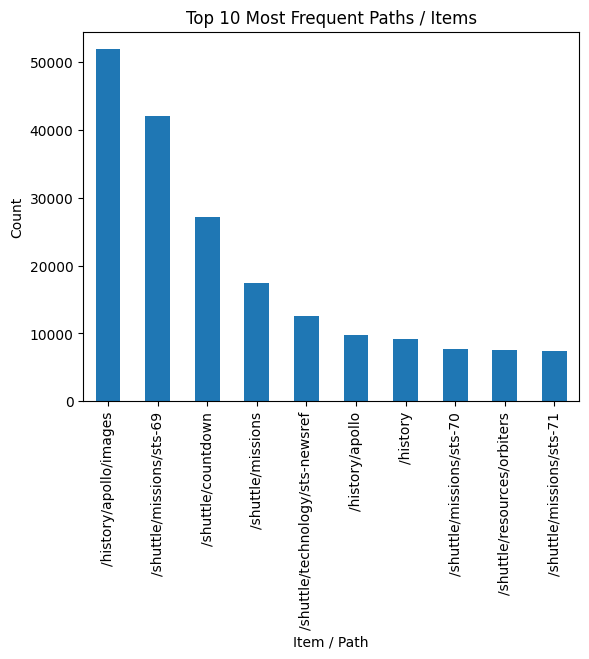

In [76]:
import matplotlib.pyplot as plt

all_items = df2.values.flatten()  

all_items = [str(x) for x in all_items if str(x).strip() not in ["", "NA"]]

items_series = pd.Series(all_items)

top_items = items_series.value_counts().head(10)

top_items.plot(kind='bar', title='Top 10 Most Frequent Paths / Items')
plt.xlabel("Item / Path")
plt.ylabel("Count")
plt.show()


In [77]:
rules.to_csv("../Data/apriori/apriori_rules.csv", index=False)
